# Procesamiento de Datos
- Permite entrenar más rapidamente los modelos
- Suele mejorar el performance del modelo

## Deteccion y Eliminacion de Outliers
### Posibles causas de Outliers
- Problemas en la carga de datos o errores humanos
- Errores generados por otros programas al "ingerir" los datos

### Como detectar Outliers
- Usar crosstabs con funciones de agregacion
- Visualmente
    - Graficos de Dispersion
    - Histogramas
   

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
cr_loan = pd.read_csv("data/cr_loan2.csv")

In [4]:
print(pd.crosstab(cr_loan['loan_status'], 
                  cr_loan['person_home_ownership'], 
                  values=cr_loan['person_emp_length'],
                  aggfunc='max'))

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


Hay personas que tienen estuvieron trabajando por más de 60 años, en la crosstab de arriba hay un ejemplo de una persona que tienen un prestamo en default, que viven en una casa rentada y estuvo trabajando por 123 años, lo cual es imposible.

Para este dataset, vamos a filtrar todas las personas que tengan más de 60 años trabajando

In [6]:
indices = cr_loan[cr_loan['person_emp_length'] > 60].index
cr_loan_new = cr_loan.drop(indices)

In [9]:
print(pd.crosstab(cr_loan_new['loan_status'], 
                  cr_loan_new['person_home_ownership'], 
                  values=cr_loan_new['person_emp_length'],
                  aggfunc=['min','max']))

                           min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0


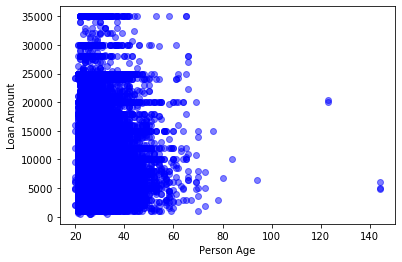

In [11]:
plt.scatter(cr_loan['person_age'], cr_loan['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

In [13]:
cr_loan_new = cr_loan.drop(cr_loan[cr_loan['person_age'] > 100].index)

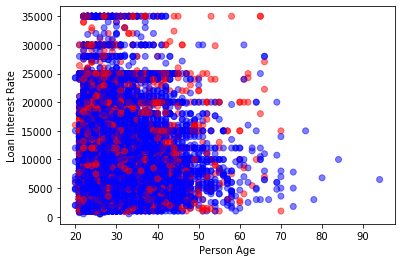

In [16]:
colors = ["blue","red"]
plt.scatter(cr_loan_new['person_age'], cr_loan_new['loan_amnt'],
            c = cr_loan_new['loan_status'],
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

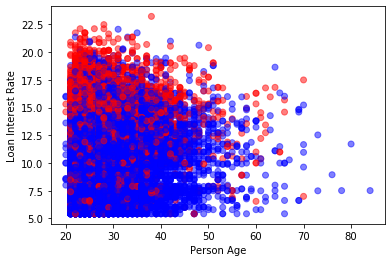

In [17]:
colors = ["blue","red"]
plt.scatter(cr_loan_new['person_age'], cr_loan_new['loan_int_rate'],
            c = cr_loan_new['loan_status'],
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

## Datos que faltan
Pueden filas que en sus columnas tienen
- Valores Nulos
- Cadenas vacias
No necesariamente toda una fila vacía, de ser así no estaria en el dataset

Datos faltantes pueden introducir bias al modelo o generar errores en algún modelo

### Como manejar datos faltantes
Se puede manejar de diferentes maneras
- Reemplazar los valores de los datos faltantes con el valor promedio de esa columna
- Remover la fila con los datos faltantes. Por ejemplo si no tenemos el monto del prestamo, esta fila aportará poco y nada al modelo
- También es posible puede dejar las filas con datos ausentes, pero este comunmente no es el caso

Por ejemplo si tenemos una fila que no tiene valores en la columna de si fue un default o no, puede ser que estemos tratando con datos recientes, por lo que debemos remover completamente la fila del conjunto de entrenamiento.
Si no tenemos la edad de una persona que pidio el prestamo, podemos utilizar el promedio de edades del dataset para poder realizar predicciones con ese registro

Utilizando los siguientes métodos de ```pandas``` es posible saber los datos nulos:
- ```isnull()``` determina si un campo es nulo
- ```any()``` aplica la función a todas las columnas de ```DataFrame```
- ```sum()``` al usarlo con isnull() sumará todas las ocurrencias

In [25]:
null_columns = cr_loan.columns[cr_loan.isnull().any()]
for i in null_columns:
    print(i)

person_emp_length
loan_int_rate


In [26]:
cr_loan[cr_loan['person_emp_length'].isnull()].head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3
